<a href="https://colab.research.google.com/github/eoinleen/Biophysics-general/blob/main/Dianthus_spectral_shift_v10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dianthus Binding Analysis Tool v9 - Multi-Dataset Edition

Features:
  • Automatic multi-dataset detection (pairs A-B, C-D, E-F, etc.)
  • Overlay plot with all datasets and best fits
  • Transparent background by default
  • Customizable color schemes
  • 5 binding models with comprehensive comparison
  • Excel output with all model results

Active color scheme: presentation

Upload your Excel file:


Saving 20251107_fitting_for_grant.xlsx to 20251107_fitting_for_grant (10).xlsx

✓ Uploaded: 20251107_fitting_for_grant (10).xlsx
File loaded: 43 rows, 6 columns

Detected 3 data pairs

Analyzing Pair 0: 26 points
   Signal direction: Decreases with concentration
   Fitted One site (increase) (k=3) — R²=0.9957, AIC=-228.07
   Fitted One site (decrease) (k=3) — R²=0.9957, AIC=-228.07
   Fitted One site + non-specific (k=4) — R²=0.9957, AIC=-226.12
   Fitted Hill equation (k=4) — R²=0.9957, AIC=-226.13
   Fitted Spectral shift (basic) (k=3) — R²=0.9956, AIC=-227.38

   Model comparison (selected by AICc):
   One site (decrease): R²=0.9957, AICc=-226.98
   One site (increase): R²=0.9957, AICc=-226.98
   Spectral shift (basic): R²=0.9956, AICc=-226.28
   Hill equation: R²=0.9957, AICc=-224.23
   One site + non-specific: R²=0.9957, AICc=-224.21
   Best model: One site (decrease) (selected by AICc)

✓ Best fit: One site (decrease)
  Kd: 667.4 nM (selected by AICc)


,Pair,Model,Equation,R²,AIC,AICc,Kd (nM),Kd SE (nM),All Parameters
0,0,One site (increase),Y = Bottom + (Top-Bottom)*X/(Kd+X),0.9957,-228.07,-226.98,667.40,42.46,Bottom=1.3872; Top=0.9385; Kd (M)=667.40 nM
1,0,One site (decrease),Y = Top - (Top-Bottom)*X/(Kd+X),0.9957,-228.07,-226.98,667.40,42.46,Top=1.3872; Bottom=0.9385; Kd (M)=667.40 nM
2,0,One site + non-specific,Y = Bottom + (Top-Bottom)*X/(Kd+X) + NS*X,0.9957,-226.12,-224.21,673.23,52.35,Bottom=1.3871; Top=0.9369; Kd (M)=673.23 nM; NS=79.4372
3,0,Hill equation,Y = Bottom + (Top-Bottom)/(1+(Kd/X)^n),0.9957,-226.13,-224.23,672.09,49.54,Bottom=1.3876; Top=0.9371; Kd (M)=672.09 nM; Hill=0.9860
4,0,Spectral shift (basic),R = R_unbound + f(C) × (R_bound - R_unbound),0.9956,-227.38,-226.28,595.30,41.69,R_unbound=1.3861; R_bound=0.9419; Kd (M)=595.30 nM



Analyzing Pair 1: 36 points
   Signal direction: Decreases with concentration
   Fitted One site (increase) (k=3) — R²=0.9470, AIC=-237.59
   Fitted One site (decrease) (k=3) — R²=0.9470, AIC=-237.59
   Fitted One site + non-specific (k=4) — R²=0.9470, AIC=-235.59
   Fitted Hill equation (k=4) — R²=0.9490, AIC=-236.99
   Fitted Spectral shift (basic) (k=3) — R²=0.9367, AIC=-231.16

   Model comparison (selected by AICc):
   One site (decrease): R²=0.9470, AICc=-236.84
   One site (increase): R²=0.9470, AICc=-236.84
   Hill equation: R²=0.9490, AICc=-235.70
   One site + non-specific: R²=0.9470, AICc=-234.30
   Spectral shift (basic): R²=0.9367, AICc=-230.41
   Best model: One site (decrease) (selected by AICc)

✓ Best fit: One site (decrease)
  Kd: 77.4 nM (selected by AICc)


,Pair,Model,Equation,R²,AIC,AICc,Kd (nM),Kd SE (nM),All Parameters
0,1,One site (increase),Y = Bottom + (Top-Bottom)*X/(Kd+X),0.9470,-237.59,-236.84,77.42,17.74,Bottom=1.2590; Top=0.9200; Kd (M)=77.42 nM
1,1,One site (decrease),Y = Top - (Top-Bottom)*X/(Kd+X),0.9470,-237.59,-236.84,77.42,17.74,Top=1.2590; Bottom=0.9200; Kd (M)=77.42 nM
2,1,One site + non-specific,Y = Bottom + (Top-Bottom)*X/(Kd+X) + NS*X,0.9470,-235.59,-234.30,77.90,19.93,Bottom=1.2589; Top=0.9194; Kd (M)=77.90 nM; NS=34.0769
3,1,Hill equation,Y = Bottom + (Top-Bottom)/(1+(Kd/X)^n),0.9490,-236.99,-235.70,74.17,19.66,Bottom=1.2675; Top=0.9127; Kd (M)=74.17 nM; Hill=0.8148
4,1,Spectral shift (basic),R = R_unbound + f(C) × (R_bound - R_unbound),0.9367,-231.16,-230.41,38.74,18.28,R_unbound=1.2471; R_bound=0.9235; Kd (M)=38.74 nM



Analyzing Pair 2: 43 points
   Signal direction: Decreases with concentration
   Fitted One site (increase) (k=3) — R²=0.9182, AIC=-324.11
   Fitted One site (decrease) (k=3) — R²=0.9182, AIC=-324.11
   Fitted One site + non-specific (k=4) — R²=0.9193, AIC=-322.70
   Fitted Hill equation (k=4) — R²=0.9185, AIC=-322.23
   Fitted Spectral shift (basic) (k=3) — R²=0.9182, AIC=-324.08

   Model comparison (selected by AICc):
   One site (decrease): R²=0.9182, AICc=-323.50
   One site (increase): R²=0.9182, AICc=-323.50
   Spectral shift (basic): R²=0.9182, AICc=-323.47
   One site + non-specific: R²=0.9193, AICc=-321.64
   Hill equation: R²=0.9185, AICc=-321.17
   Best model: One site (decrease) (selected by AICc)

✓ Best fit: One site (decrease)
  Kd: 3833.4 nM (selected by AICc)


,Pair,Model,Equation,R²,AIC,AICc,Kd (nM),Kd SE (nM),All Parameters
0,2,One site (increase),Y = Bottom + (Top-Bottom)*X/(Kd+X),0.9182,-324.11,-323.50,3833.41,839.89,Bottom=1.1838; Top=0.9426; Kd (M)=3833.41 nM
1,2,One site (decrease),Y = Top - (Top-Bottom)*X/(Kd+X),0.9182,-324.11,-323.50,3833.37,839.88,Top=1.1838; Bottom=0.9426; Kd (M)=3833.37 nM
2,2,One site + non-specific,Y = Bottom + (Top-Bottom)*X/(Kd+X) + NS*X,0.9193,-322.70,-321.64,3230.52,1068.61,Bottom=1.1843; Top=0.9635; Kd (M)=3230.52 nM; NS=-384.0765
3,2,Hill equation,Y = Bottom + (Top-Bottom)/(1+(Kd/X)^n),0.9185,-322.23,-321.17,4122.81,1360.89,Bottom=1.1844; Top=0.9361; Kd (M)=4122.81 nM; Hill=0.9365
4,2,Spectral shift (basic),R = R_unbound + f(C) × (R_bound - R_unbound),0.9182,-324.08,-323.47,3747.11,834.84,R_unbound=1.1837; R_bound=0.9432; Kd (M)=3747.11 nM



✓ Saved results to Dianthus_results_all_models.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


SUMMARY - All Model Results:
 Pair                   Model                                     Equation       R²         AIC        AICc     Kd (nM)  Kd SE (nM)                                             All Parameters
    0     One site (increase)           Y = Bottom + (Top-Bottom)*X/(Kd+X) 0.995675 -228.070666 -226.979757  667.395785   42.455783                Bottom=1.3872; Top=0.9385; Kd (M)=667.40 nM
    0     One site (decrease)              Y = Top - (Top-Bottom)*X/(Kd+X) 0.995675 -228.070666 -226.979757  667.395663   42.455775                Top=1.3872; Bottom=0.9385; Kd (M)=667.40 nM
    0 One site + non-specific    Y = Bottom + (Top-Bottom)*X/(Kd+X) + NS*X 0.995683 -226.119740 -224.214978  673.234708   52.345242    Bottom=1.3871; Top=0.9369; Kd (M)=673.23 nM; NS=79.4372
    0           Hill equation       Y = Bottom + (Top-Bottom)/(1+(Kd/X)^n) 0.995685 -226.132010 -224.227248  672.086927   49.542953   Bottom=1.3876; Top=0.9371; Kd (M)=672.09 nM; Hill=0.9860
    0  Spectral

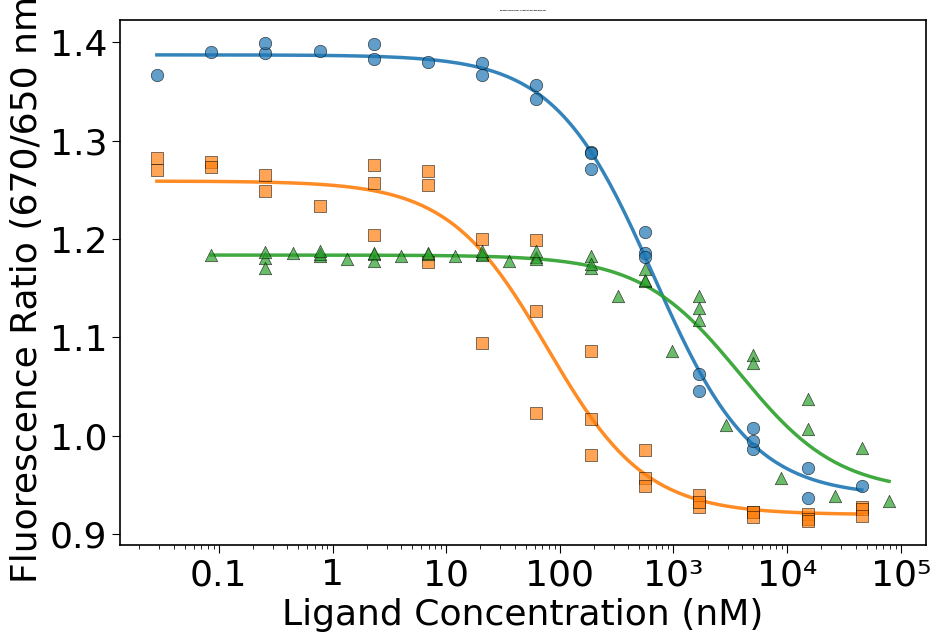


INDIVIDUAL PLOTS - One Plot Per Model (All Models)

--- Pair 0 ---


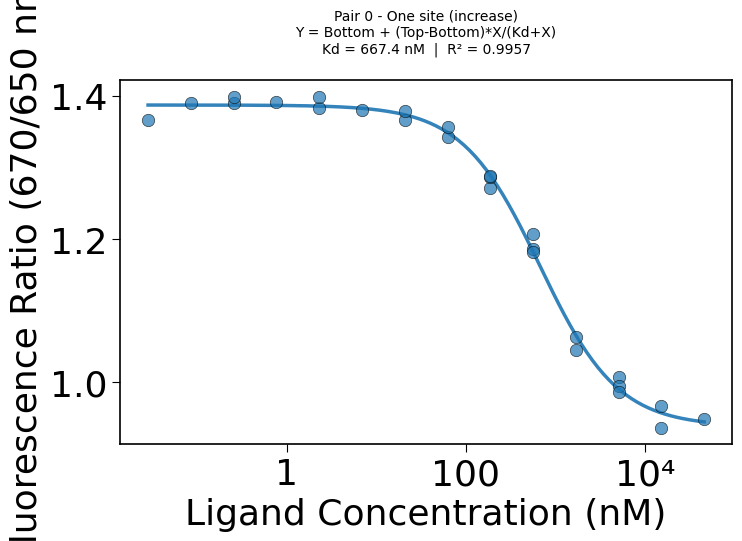

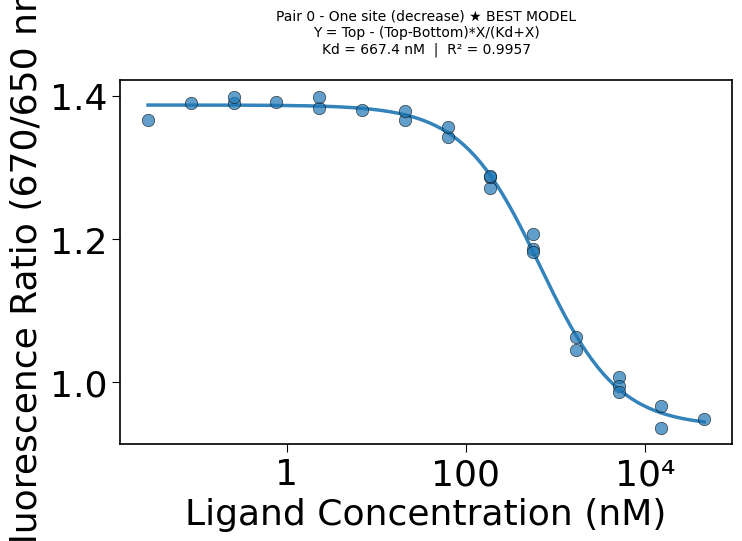

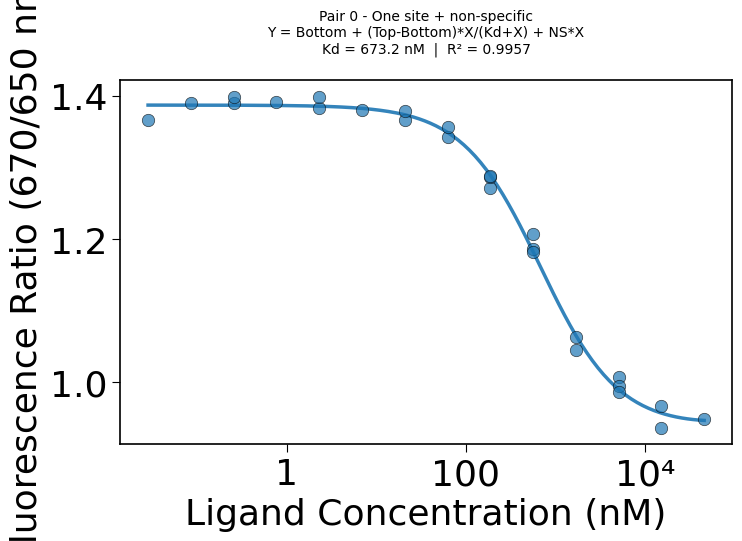

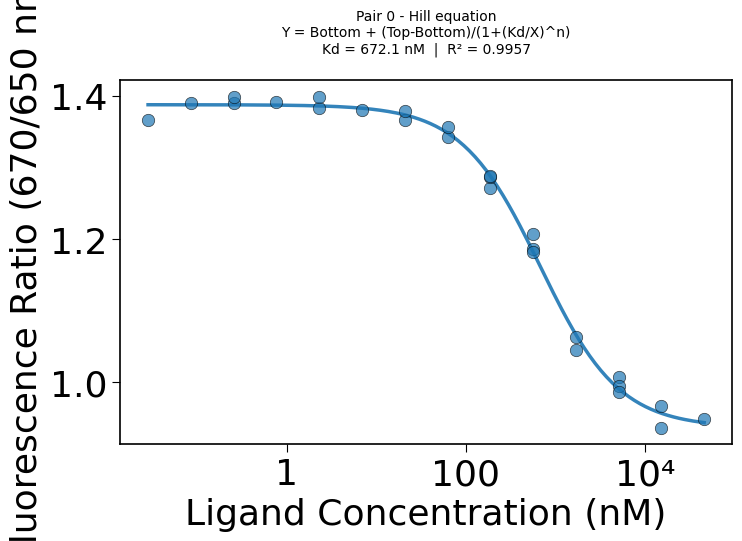

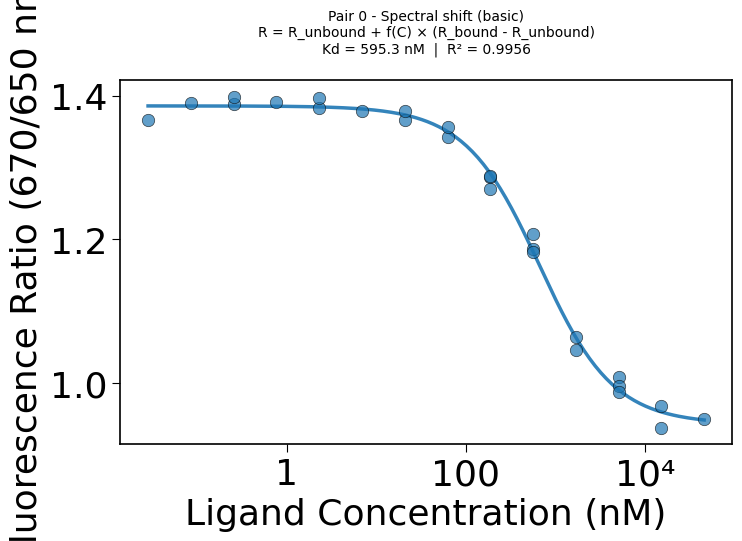


--- Pair 1 ---


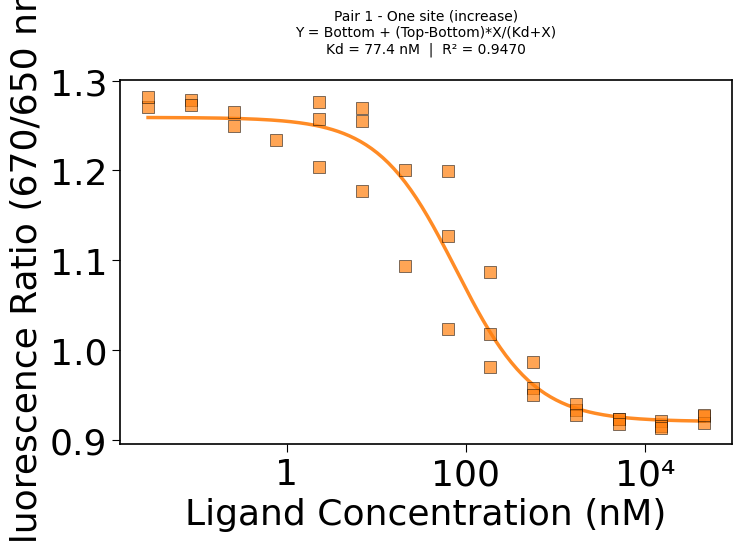

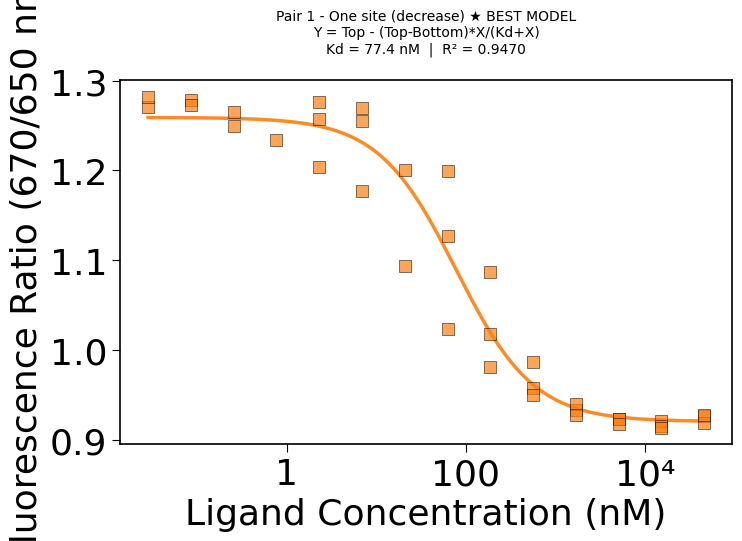

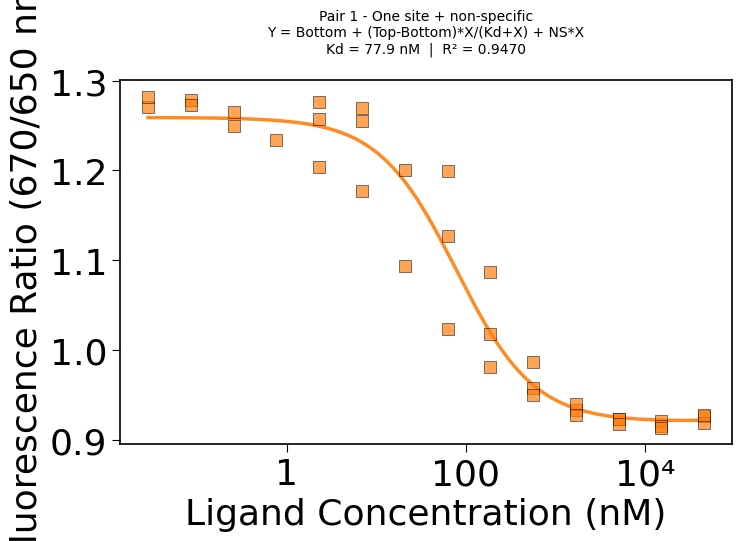

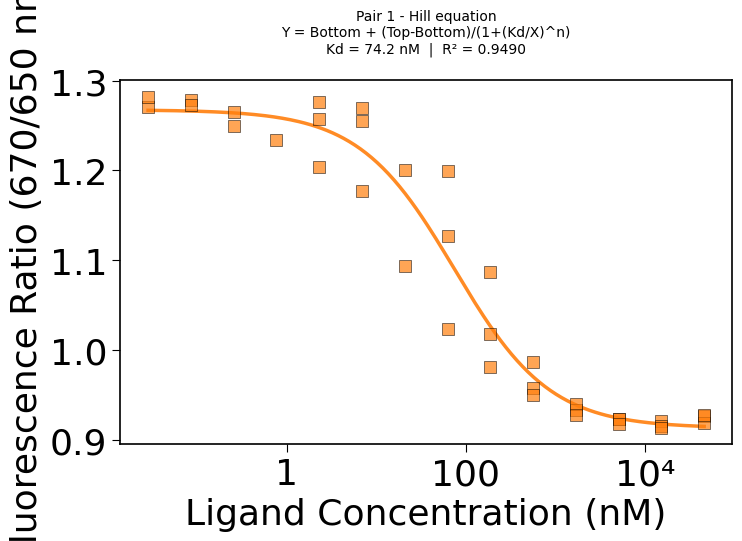

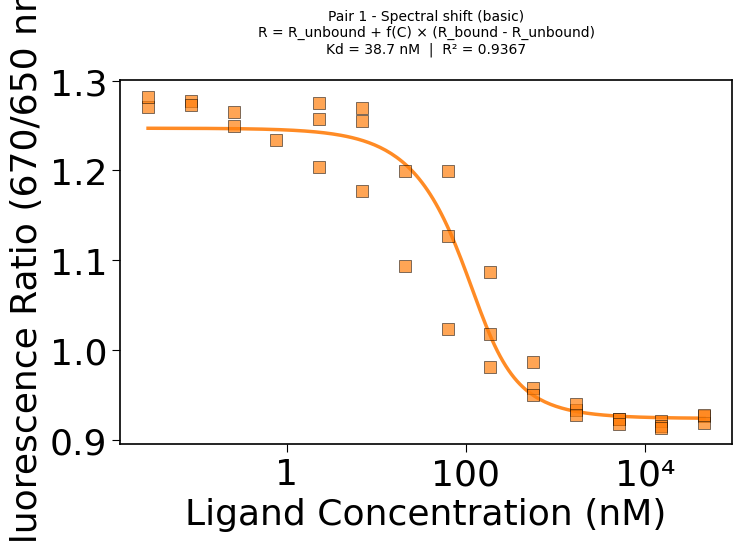


--- Pair 2 ---


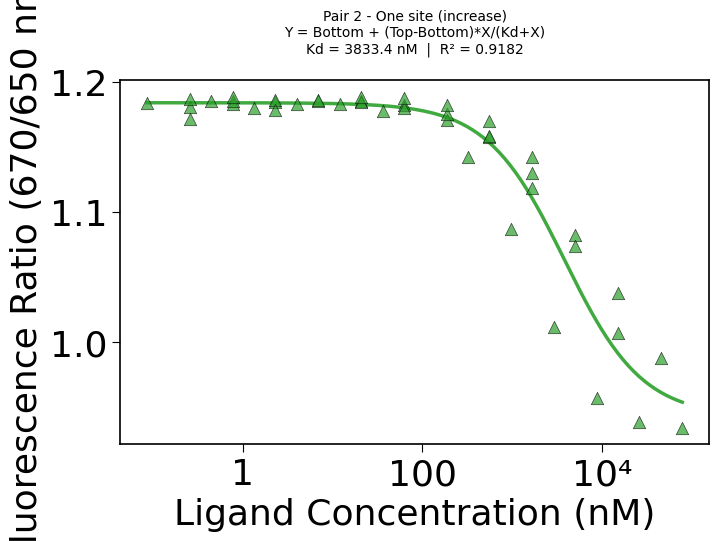

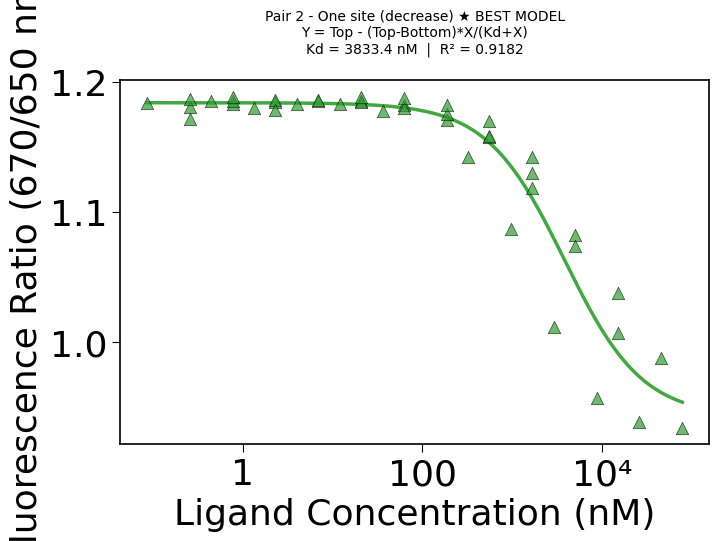

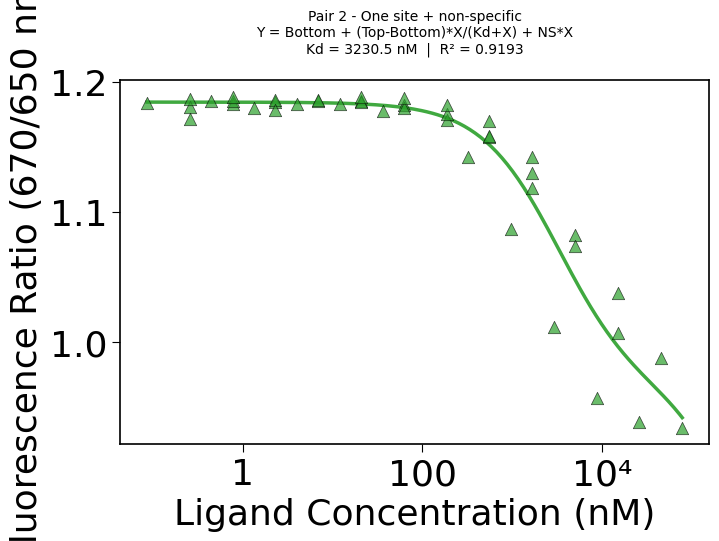

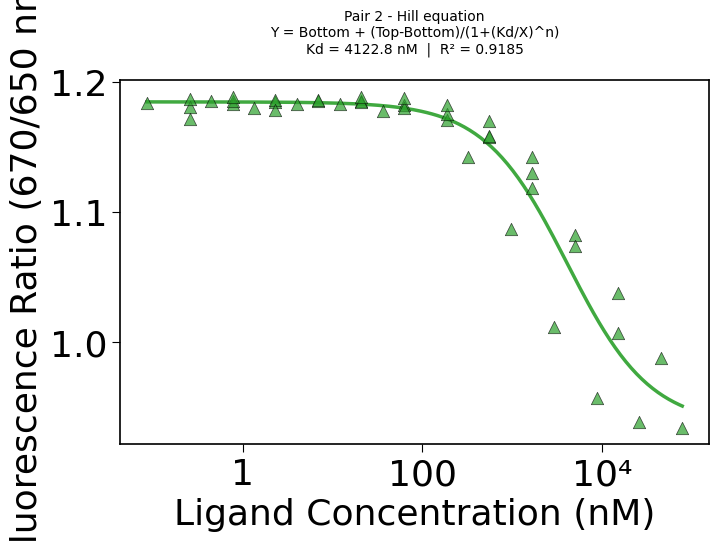

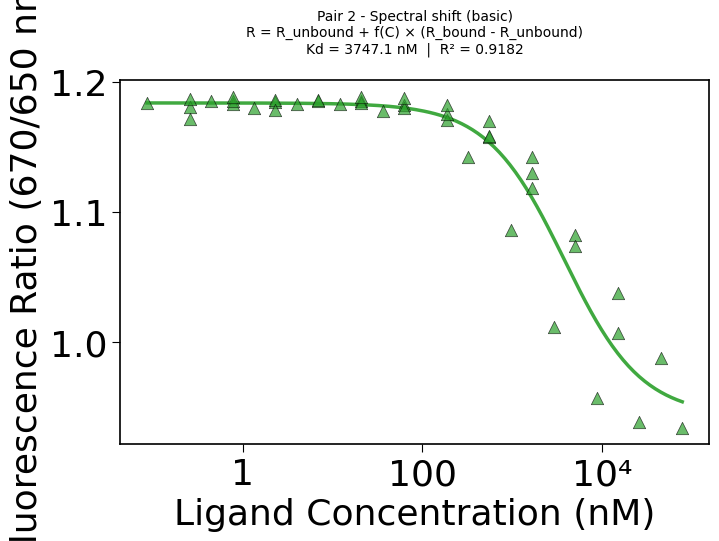

In [13]:
"""
Dianthus Binding Assay Analysis Script v9
============================================
Analyzes binding assay data with bidirectional signals and spectral shift models.
NOW WITH MULTI-DATASET SUPPORT!

Features:
- Handles multiple column pairs automatically (A-B, C-D, E-F, etc.)
- Transparent background by default
- Overlay plot showing all datasets with fits
- Customizable color schemes
- Reports parameters for ALL tested models
- Saves comprehensive results to Excel
"""

# ============================================================================
# USER OPTIONS
# ============================================================================

TARGET_PROTEIN_CONCENTRATION_NM = 125.0   # nM
TARGET_PROTEIN_CONCENTRATION_M = TARGET_PROTEIN_CONCENTRATION_NM * 1e-9

EXCEL_HAS_HEADER = True   # True = first row is header; False = first row is data
PLOT_ALL_DATA_ON_SINGLE_GRAPH = True  # Create overlay plot with all datasets

# ============================================================================
# STYLE OPTIONS - Customize Your Plot Appearance
# ============================================================================

PLOT_STYLE = {
    "font_family": "DejaVu Sans",    # Universal font that works everywhere
    "line_width": 2.5,               # Medium thickness curves
    "marker_size": 80,              # Medium-sized data points
    "background": "none",            # Transparent background (use "white" for solid)
    "grid": False,                   # No grid lines
    "tick_direction": "out",         # Ticks point outward
    "tick_length_major": 6,          # Standard major ticks
    "tick_length_minor": 3,          # Subtle minor ticks
}

# ============================================================================
# FONT SIZE OPTIONS - Fine-tune text sizes for different elements
# ============================================================================
#
# title_size: Size of main plot titles
#   Example: 14 (standard), 16 (large), 12 (compact)
#
# axis_label_size: Size of axis labels (e.g., "Ligand Concentration (nM)")
#   Example: 12 (standard), 14 (large), 10 (compact)
#
# tick_label_size: Size of axis tick numbers (e.g., "0.1", "1", "10")
#   Example: 10 (standard), 12 (large), 8 (small)
#
# annotation_size: Size of annotations like Kd values and equations
#   Example: 10 (standard), 11 (large), 9 (small)
#
# legend_size: Size of legend text (when legends are shown)
#   Example: 10 (standard), 11 (large), 9 (small)
# ============================================================================

FONT_SIZES = {
    "title_size": 0,           # Main plot titles
    "axis_label_size": 26,      # Axis titles ("Ligand Concentration (nM)", etc.)
    "tick_label_size": 26,      # Numbers on axes (0.1, 1, 10, 100, etc.)
    "annotation_size": 10,      # Kd values, equations, text boxes
    "legend_size": 10,          # Legend text (when used)
}

# ============================================================================
# COLOR SCHEME - Customize Dataset Colors
# ============================================================================
# Each dataset gets assigned a color from this list in order
# You can modify these colors to match your presentation needs
# Format: standard color names or hex codes like '#1f77b4'

COLOR_SCHEMES = {
    "presentation": {
        # Professional colors good for presentations
        "colors": ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                   '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'],
        "markers": ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
    },
    "colorblind": {
        # Colorblind-friendly palette (Wong 2011)
        "colors": ['#0173b2', '#de8f05', '#029e73', '#cc78bc', '#ca9161',
                   '#949494', '#ece133', '#56b4e9'],
        "markers": ['o', 's', '^', 'D', 'v', '<', '>', 'p']
    },
    "vibrant": {
        # High-contrast vibrant colors
        "colors": ['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311',
                   '#009988', '#BBBBBB'],
        "markers": ['o', '^', 's', 'D', 'v', 'p', '*']
    },
    "grayscale": {
        # Grayscale for black & white printing
        "colors": ['#000000', '#404040', '#808080', '#A0A0A0', '#C0C0C0'],
        "markers": ['o', 's', '^', 'D', 'v']
    }
}

# Select your color scheme here
ACTIVE_COLOR_SCHEME = "presentation"  # Options: "presentation", "colorblind", "vibrant", "grayscale"

def apply_plot_style():
    import matplotlib.pyplot as plt
    plt.rcParams.update({
        "font.family": PLOT_STYLE["font_family"],
        "font.size": FONT_SIZES["tick_label_size"],  # Default size for tick labels
        "axes.titlesize": FONT_SIZES["title_size"],
        "axes.labelsize": FONT_SIZES["axis_label_size"],
        "xtick.labelsize": FONT_SIZES["tick_label_size"],
        "ytick.labelsize": FONT_SIZES["tick_label_size"],
        "legend.fontsize": FONT_SIZES["legend_size"],
        "axes.linewidth": 1.2,
        "axes.grid": PLOT_STYLE["grid"],
        "xtick.direction": PLOT_STYLE["tick_direction"],
        "ytick.direction": PLOT_STYLE["tick_direction"],
        "xtick.major.size": PLOT_STYLE["tick_length_major"],
        "ytick.major.size": PLOT_STYLE["tick_length_major"],
        "xtick.minor.size": PLOT_STYLE["tick_length_minor"],
        "ytick.minor.size": PLOT_STYLE["tick_length_minor"],
        "figure.facecolor": PLOT_STYLE["background"],
        "axes.facecolor": PLOT_STYLE["background"],
    })

apply_plot_style()

# ============================================================================
# IMPORTS
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sys
import traceback

# Try Google Colab imports
try:
    from google.colab import files
    from IPython.display import display
    IN_COLAB = True
except ImportError:
    IN_COLAB = False
    print("Not running in Google Colab - file upload/download features disabled")

# ============================================================================
# COLOR MANAGEMENT
# ============================================================================

def get_pair_style(pair_idx):
    """Get color and marker for a given dataset pair index."""
    scheme = COLOR_SCHEMES[ACTIVE_COLOR_SCHEME]
    colors = scheme["colors"]
    markers = scheme["markers"]

    color_idx = pair_idx % len(colors)
    marker_idx = pair_idx % len(markers)

    return colors[color_idx], markers[marker_idx]

# ============================================================================
# HELPER FUNCTIONS
# ============================================================================

def safe_param_errors(pcov):
    """Extract standard errors from covariance matrix safely."""
    if pcov is None:
        return None
    try:
        diag = np.diag(pcov)
        diag = np.clip(diag, 0, np.inf)
        se = np.sqrt(diag)
        se[~np.isfinite(se)] = np.nan
        return se
    except Exception:
        return None

def aic_from_residuals(n, ss_res, k):
    """Calculate AIC and AICc from residuals."""
    if n <= 0 or ss_res <= 0:
        return np.nan, np.nan
    try:
        aic = n * np.log(ss_res / n) + 2 * k
        if n - k - 1 > 0:
            aicc = aic + (2 * k * (k + 1)) / (n - k - 1)
        else:
            aicc = np.nan
        return aic, aicc
    except Exception:
        return np.nan, np.nan

def _prepare_nonzero_conc(conc, ratios, min_positive=1e-12, drop_zeros=True):
    """Prepare concentration data by removing invalid values."""
    conc = np.asarray(conc, dtype=float)
    ratios = np.asarray(ratios, dtype=float)
    mask = np.isfinite(conc) & np.isfinite(ratios)
    conc = conc[mask]
    ratios = ratios[mask]

    if drop_zeros:
        good = conc > 0
        if not np.any(good):
            conc = np.clip(conc, min_positive, None)
            return conc, ratios
        return conc[good], ratios[good]
    else:
        conc = np.clip(conc, min_positive, None)
        return conc, ratios

# ============================================================================
# BINDING MODELS
# ============================================================================

def one_site_binding_increase(x, bottom, top, kd):
    """One-site binding with signal increase."""
    return bottom + (top - bottom) * x / (kd + x)

def one_site_binding_decrease(x, top, bottom, kd):
    """One-site binding with signal decrease."""
    return top - (top - bottom) * x / (kd + x)

def one_site_binding_ns(x, bottom, top, kd, ns):
    """One-site binding with non-specific component."""
    return bottom + (top - bottom) * x / (kd + x) + ns * x

def hill_equation_bidirectional(x, bottom, top, kd, hill_coeff):
    """Hill equation for cooperative binding."""
    return bottom + (top - bottom) / (1 + (kd / x) ** hill_coeff)

def fraction_bound_spectral_shift(c_ligand, kd, c_target):
    """Calculate fraction bound for spectral shift model."""
    term = c_ligand + c_target + kd
    sqrt_term = np.sqrt(np.maximum(term**2 - 4 * c_ligand * c_target, 0))
    f_bound = (term - sqrt_term) / (2 * c_target)
    return np.clip(f_bound, 0, 1)

def spectral_shift_basic(x, r_unbound, r_bound, kd):
    """Spectral shift model for ratiometric measurements."""
    f_bound = fraction_bound_spectral_shift(x, kd, TARGET_PROTEIN_CONCENTRATION_M)
    return r_unbound + f_bound * (r_bound - r_unbound)

def get_equation_string(model_name):
    """Return equation string for each model."""
    equations = {
        'One site (increase)': 'Y = Bottom + (Top-Bottom)*X/(Kd+X)',
        'One site (decrease)': 'Y = Top - (Top-Bottom)*X/(Kd+X)',
        'One site + non-specific': 'Y = Bottom + (Top-Bottom)*X/(Kd+X) + NS*X',
        'Hill equation': 'Y = Bottom + (Top-Bottom)/(1+(Kd/X)^n)',
        'Spectral shift (basic)': 'R = R_unbound + f(C) × (R_bound - R_unbound)'
    }
    return equations.get(model_name, 'Unknown equation')

# ============================================================================
# MAIN FITTING FUNCTION
# ============================================================================

def analyze_binding_data(concentrations, ratios, verbose=True):
    """
    Fit multiple binding models to data and return best model plus all results.
    """
    try:
        concentrations = np.asarray(concentrations, dtype=float)
        ratios = np.asarray(ratios, dtype=float)

        # Sort by concentration
        sort_idx = np.argsort(concentrations)
        conc_sorted = concentrations[sort_idx]
        ratio_sorted = ratios[sort_idx]

        # Prepare for fitting
        conc_for_fit, ratio_for_fit = _prepare_nonzero_conc(conc_sorted, ratio_sorted, drop_zeros=True)

        if len(conc_for_fit) < 4 and verbose:
            print("   Warning: Not enough non-zero data points for reliable fitting (need >=4).")

        # Determine signal direction
        signal_increases = ratio_sorted[-1] > ratio_sorted[0] if len(ratio_sorted) >= 2 else True
        if verbose:
            print(f"   Signal direction: {'Increases' if signal_increases else 'Decreases'} with concentration")

        models_to_test = []

        def try_fit(func, p0, bounds=(-np.inf, np.inf), param_names=None, kd_index=2, model_name="Unknown"):
            """Attempt to fit a model and store results."""
            try:
                popt, pcov = curve_fit(func, conc_for_fit, ratio_for_fit, p0=p0, bounds=bounds, maxfev=5000)
                fitted = func(conc_for_fit, *popt)
                ss_res = np.sum((ratio_for_fit - fitted) ** 2)
                ss_tot = np.sum((ratio_for_fit - np.mean(ratio_for_fit)) ** 2)
                r2 = 1 - ss_res / ss_tot if ss_tot > 0 else np.nan
                n = len(conc_for_fit)
                k = len(popt)
                aic, aicc = aic_from_residuals(n, ss_res, k)
                se = safe_param_errors(pcov)

                models_to_test.append({
                    'name': model_name,
                    'params': popt,
                    'pcov': pcov,
                    'param_errors': se,
                    'param_names': param_names,
                    'r2': r2,
                    'ss_res': ss_res,
                    'ss_tot': ss_tot,
                    'n': n,
                    'k': k,
                    'aic': aic,
                    'aicc': aicc,
                    'fitted': fitted,
                    'function': func,
                    'kd_index': kd_index,
                    'equation': get_equation_string(model_name)
                })

                if verbose:
                    print(f"   Fitted {model_name} (k={k}) — R²={r2:.4f}, AIC={aic:.2f}")
                return True
            except Exception as e:
                if verbose:
                    print(f"   Fit failed for {model_name}: {e}")
                return False

        # Fit all models
        if len(conc_for_fit):
            bottom = np.nanmin(ratio_sorted)
            top = np.nanmax(ratio_sorted)
            kd_guess = np.median(conc_for_fit) if len(conc_for_fit) else 1e-9

            # Model 1: One site increase
            p0 = [bottom, top, kd_guess]
            bounds = ([0, 0, 1e-12], [np.inf, np.inf, np.inf])
            try_fit(one_site_binding_increase, p0, bounds=bounds,
                    param_names=['Bottom', 'Top', 'Kd (M)'], kd_index=2,
                    model_name='One site (increase)')

            # Model 2: One site decrease
            p0 = [top, bottom, kd_guess]
            bounds = ([0, 0, 1e-12], [np.inf, np.inf, np.inf])
            try_fit(one_site_binding_decrease, p0, bounds=bounds,
                    param_names=['Top', 'Bottom', 'Kd (M)'], kd_index=2,
                    model_name='One site (decrease)')

            # Model 3: One site + non-specific
            if signal_increases:
                p0 = [bottom, top, kd_guess, 0.0]
            else:
                p0 = [top, bottom, kd_guess, 0.0]
            bounds = ([0, 0, 1e-12, -np.inf], [np.inf, np.inf, np.inf, np.inf])
            try_fit(one_site_binding_ns, p0, bounds=bounds,
                    param_names=['Bottom', 'Top', 'Kd (M)', 'NS'], kd_index=2,
                    model_name='One site + non-specific')

            # Model 4: Hill equation
            if signal_increases:
                p0 = [bottom, top, kd_guess, 1.0]
            else:
                p0 = [top, bottom, kd_guess, 1.0]
            bounds = ([0, 0, 1e-12, 0.1], [np.inf, np.inf, np.inf, 5.0])
            try_fit(hill_equation_bidirectional, p0, bounds=bounds,
                    param_names=['Bottom', 'Top', 'Kd (M)', 'Hill'], kd_index=2,
                    model_name='Hill equation')

            # Model 5: Spectral shift
            r_unbound_guess = ratio_sorted[0]
            r_bound_guess = ratio_sorted[-1]
            p0 = [r_unbound_guess, r_bound_guess, kd_guess]
            bounds = ([0, 0, 1e-12], [np.inf, np.inf, np.inf])
            try_fit(spectral_shift_basic, p0, bounds=bounds,
                    param_names=['R_unbound', 'R_bound', 'Kd (M)'], kd_index=2,
                    model_name='Spectral shift (basic)')

        if not models_to_test:
            if verbose:
                print("   No models succeeded.")
            return None

        # Select best model
        valid_models = [m for m in models_to_test if np.isfinite(m.get('aicc', np.nan))]
        if valid_models:
            best = min(valid_models, key=lambda m: m['aicc'])
            selection_method = "AICc"
        else:
            valid_models = [m for m in models_to_test if np.isfinite(m.get('aic', np.nan))]
            if valid_models:
                best = min(valid_models, key=lambda m: m['aic'])
                selection_method = "AIC"
            else:
                best = max(models_to_test, key=lambda m: m.get('r2', -np.inf))
                selection_method = "R²"

        # Generate smooth curve for plotting
        min_c = np.min(conc_for_fit)
        max_c = np.max(conc_for_fit)
        if min_c <= 0:
            min_c = np.min(np.clip(conc_for_fit, 1e-12, None))
        conc_smooth = np.logspace(np.log10(min_c), np.log10(max_c), 200)
        smooth_vals = best['function'](conc_smooth, *best['params'])

        if verbose:
            print(f"\n   Model comparison (selected by {selection_method}):")
            for model in sorted(models_to_test, key=lambda x: x.get('aicc', x.get('aic', -x.get('r2', 0)))):
                aicc_str = f"AICc={model['aicc']:.2f}" if np.isfinite(model.get('aicc', np.nan)) else "AICc=n/a"
                print(f"   {model['name']}: R²={model['r2']:.4f}, {aicc_str}")
            print(f"   Best model: {best['name']} (selected by {selection_method})")

        result = {
            'parameters': best['params'],
            'param_errors': best.get('param_errors', None),
            'param_names': best.get('param_names', None),
            'r2': best.get('r2', np.nan),
            'method': best['name'],
            'equation': best.get('equation', ''),
            'original_conc': conc_sorted,
            'original_ratios': ratio_sorted,
            'smooth_conc': conc_smooth,
            'smooth_ratios': smooth_vals,
            'all_models': models_to_test,
            'kd_index': best.get('kd_index', 2),
            'aic': best.get('aic', np.nan),
            'aicc': best.get('aicc', np.nan),
            'selection_method': selection_method
        }

        return result

    except Exception as e:
        print("Fitting failed:", e)
        traceback.print_exc(limit=3, file=sys.stdout)
        return None

# ============================================================================
# PLOTTING FUNCTIONS
# ============================================================================

def plot_single_pair_single_model(pair_idx, all_data_pair, model, is_best=False):
    """Create a plot showing a single model fit for a single pair."""
    fig, ax = plt.subplots(figsize=(8, 6))
    color, symbol = get_pair_style(pair_idx)

    conc_nm = all_data_pair['conc_m'] * 1e9

    # Plot data points
    if symbol in ['x', '+', '.', ',']:
        ax.scatter(conc_nm, all_data_pair['ratios'],
                  s=PLOT_STYLE['marker_size'],
                  marker=symbol,
                  color=color,
                  alpha=0.7,
                  zorder=5)
    else:
        ax.scatter(conc_nm, all_data_pair['ratios'],
                  s=PLOT_STYLE['marker_size'],
                  marker=symbol,
                  color=color,
                  alpha=0.7,
                  edgecolors='black',
                  linewidths=0.5,
                  zorder=5)

    # Generate smooth curve
    conc_sorted = np.sort(all_data_pair['conc_m'])
    conc_for_plot = conc_sorted[conc_sorted > 0]

    if len(conc_for_plot) > 0:
        min_c = np.min(conc_for_plot)
        max_c = np.max(conc_for_plot)
        conc_smooth = np.logspace(np.log10(min_c), np.log10(max_c), 200)
        conc_smooth_nm = conc_smooth * 1e9

        try:
            fitted_vals = model['function'](conc_smooth, *model['params'])
            kd_nm = model['params'][model['kd_index']] * 1e9

            ax.plot(conc_smooth_nm, fitted_vals,
                   color=color,
                   linewidth=PLOT_STYLE['line_width'],
                   linestyle='-',
                   alpha=0.9)

            title_lines = [f"Pair {pair_idx} - {model['name']}"]
            if is_best:
                title_lines[0] += " ★ BEST MODEL"
            title_lines.append(f"{model['equation']}")
            title_lines.append(f"Kd = {kd_nm:.1f} nM  |  R² = {model['r2']:.4f}")
            title = '\n'.join(title_lines)

        except Exception as e:
            print(f"Warning: Could not plot {model['name']}: {e}")
            title = f"Pair {pair_idx} - {model['name']}"
    else:
        title = f"Pair {pair_idx} - {model['name']}"

    ax.set_xlabel('Ligand Concentration (nM)', fontsize=FONT_SIZES['axis_label_size'])
    ax.set_ylabel('Fluorescence Ratio (670/650 nm)', fontsize=FONT_SIZES['axis_label_size'])
    ax.set_title(title, fontsize=FONT_SIZES['annotation_size'], pad=20)
    ax.set_xscale('log')

    # Custom x-axis formatter: regular numbers up to 1000, then superscript notation
    from matplotlib.ticker import FuncFormatter
    def custom_formatter(x, pos):
        if x < 1000:
            if x >= 1:
                return f'{x:.0f}'
            else:
                return f'{x:.1f}'
        else:
            # Use superscript notation (10³, 10⁴, etc.)
            exponent = int(np.log10(x))
            mantissa = x / (10 ** exponent)
            if abs(mantissa - 1.0) < 0.01:  # If close to a pure power of 10
                superscripts = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
                return f'10{str(exponent).translate(superscripts)}'
            else:
                return f'{mantissa:.0f}×10{str(exponent).translate(superscripts)}'
    ax.xaxis.set_major_formatter(FuncFormatter(custom_formatter))

    if PLOT_STYLE['grid']:
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


def plot_binding_data(all_data, fit_results, plot_all_on_single=True):
    """Create plots of binding data with fitted curves."""
    if not fit_results:
        print("No fit results to plot.")
        return

    if plot_all_on_single:
        # OVERLAY PLOT - All pairs on one graph with best model fits
        fig, ax = plt.subplots(figsize=(10, 7))

        for pair_idx in sorted(fit_results.keys()):
            result = fit_results[pair_idx]
            color, symbol = get_pair_style(pair_idx)

            # Plot data points
            conc_nm = result['original_conc'] * 1e9

            if symbol in ['x', '+', '.', ',']:
                ax.scatter(conc_nm, result['original_ratios'],
                          s=PLOT_STYLE['marker_size'],
                          marker=symbol,
                          color=color,
                          alpha=0.7,
                          zorder=5)
            else:
                ax.scatter(conc_nm, result['original_ratios'],
                          s=PLOT_STYLE['marker_size'],
                          marker=symbol,
                          color=color,
                          alpha=0.7,
                          edgecolors='black',
                          linewidths=0.5,
                          zorder=5)

            # Plot fitted curve
            smooth_conc_nm = result['smooth_conc'] * 1e9
            kd_nm = result['parameters'][result['kd_index']] * 1e9
            ax.plot(smooth_conc_nm, result['smooth_ratios'],
                   color=color,
                   linewidth=PLOT_STYLE['line_width'],
                   alpha=0.9,
                   zorder=3)

        ax.set_xlabel('Ligand Concentration (nM)', fontsize=FONT_SIZES['axis_label_size'])
        ax.set_ylabel('Fluorescence Ratio (670/650 nm)', fontsize=FONT_SIZES['axis_label_size'])
        ax.set_title('Dianthus Binding Assay - All Datasets with Best Model Fits',
                    fontsize=FONT_SIZES['title_size'], fontweight='bold')
        ax.set_xscale('log')

        # Custom x-axis formatter: regular numbers up to 1000, then superscript notation
        from matplotlib.ticker import FuncFormatter
        def custom_formatter(x, pos):
            if x < 1000:
                if x >= 1:
                    return f'{x:.0f}'
                else:
                    return f'{x:.1f}'
            else:
                # Use superscript notation (10³, 10⁴, etc.)
                exponent = int(np.log10(x))
                mantissa = x / (10 ** exponent)
                if abs(mantissa - 1.0) < 0.01:  # If close to a pure power of 10
                    superscripts = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
                    return f'10{str(exponent).translate(superscripts)}'
                else:
                    return f'{mantissa:.0f}×10{str(exponent).translate(superscripts)}'
        ax.xaxis.set_major_formatter(FuncFormatter(custom_formatter))

        if PLOT_STYLE['grid']:
            ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    else:
        # Separate subplot for each pair
        n_pairs = len(fit_results)
        n_cols = min(2, n_pairs)
        n_rows = (n_pairs + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(7*n_cols, 5*n_rows))
        if n_pairs == 1:
            axes = [axes]
        else:
            axes = axes.flatten()

        for idx, pair_idx in enumerate(sorted(fit_results.keys())):
            result = fit_results[pair_idx]
            ax = axes[idx]
            color, symbol = get_pair_style(pair_idx)

            conc_nm = result['original_conc'] * 1e9

            if symbol in ['x', '+', '.', ',']:
                ax.scatter(conc_nm, result['original_ratios'],
                          s=PLOT_STYLE['marker_size'],
                          marker=symbol,
                          color=color,
                          label='Data',
                          alpha=0.7)
            else:
                ax.scatter(conc_nm, result['original_ratios'],
                          s=PLOT_STYLE['marker_size'],
                          marker=symbol,
                          color=color,
                          label='Data',
                          alpha=0.7,
                          edgecolors='black',
                          linewidths=0.5)

            smooth_conc_nm = result['smooth_conc'] * 1e9
            ax.plot(smooth_conc_nm, result['smooth_ratios'],
                   color=color,
                   linewidth=PLOT_STYLE['line_width'],
                   label=f"{result['method']}",
                   alpha=0.8)

            kd_nm = result['parameters'][result['kd_index']] * 1e9
            ax.text(0.05, 0.95, f"Kd = {kd_nm:.1f} nM",
                   transform=ax.transAxes,
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                   fontsize=FONT_SIZES['annotation_size'])

            ax.set_xlabel('Ligand Concentration (nM)', fontsize=FONT_SIZES['axis_label_size'])
            ax.set_ylabel('Fluorescence Ratio (670/650 nm)', fontsize=FONT_SIZES['axis_label_size'])
            ax.set_title(f'Pair {pair_idx}', fontsize=FONT_SIZES['title_size'], fontweight='bold')
            ax.set_xscale('log')
            ax.legend(loc='best', fontsize=FONT_SIZES['legend_size'])

            # Custom x-axis formatter
            from matplotlib.ticker import FuncFormatter
            def custom_formatter(x, pos):
                if x < 1000:
                    if x >= 1:
                        return f'{x:.0f}'
                    else:
                        return f'{x:.1f}'
                else:
                    # Use superscript notation (10³, 10⁴, etc.)
                    exponent = int(np.log10(x))
                    mantissa = x / (10 ** exponent)
                    if abs(mantissa - 1.0) < 0.01:
                        superscripts = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
                        return f'10{str(exponent).translate(superscripts)}'
                    else:
                        return f'{mantissa:.0f}×10{str(exponent).translate(superscripts)}'
            ax.xaxis.set_major_formatter(FuncFormatter(custom_formatter))

            if PLOT_STYLE['grid']:
                ax.grid(True, alpha=0.3)

        # Hide unused subplots
        for idx in range(len(fit_results), len(axes)):
            axes[idx].set_visible(False)

        plt.tight_layout()
        plt.show()

    # Individual plots for each model
    print("\n" + "="*70)
    print("INDIVIDUAL PLOTS - One Plot Per Model (All Models)")
    print("="*70)
    for pair_idx in sorted(fit_results.keys()):
        result = fit_results[pair_idx]
        best_model_name = result['method']

        print(f"\n--- Pair {pair_idx} ---")
        for model in result['all_models']:
            is_best = (model['name'] == best_model_name)
            plot_single_pair_single_model(pair_idx, all_data[pair_idx], model, is_best=is_best)

# ============================================================================
# RESULTS PROCESSING
# ============================================================================

def models_to_dataframe(all_models, pair_idx):
    """Convert all fitted models to a pandas DataFrame."""
    rows = []
    for m in all_models:
        row = {}
        row['Pair'] = pair_idx
        row['Model'] = m['name']
        row['Equation'] = m.get('equation', '')
        row['R²'] = m.get('r2', np.nan)
        row['AIC'] = m.get('aic', np.nan)
        row['AICc'] = m.get('aicc', np.nan)

        kd_idx = m.get('kd_index', 2)
        params = m.get('params', [])
        se = m.get('param_errors', None)

        if len(params) > kd_idx:
            kd_m = params[kd_idx]
            row['Kd (nM)'] = kd_m * 1e9
            kd_se_m = se[kd_idx] if (se is not None and len(se) > kd_idx) else np.nan
            row['Kd SE (nM)'] = kd_se_m * 1e9 if np.isfinite(kd_se_m) else np.nan
        else:
            row['Kd (nM)'] = np.nan
            row['Kd SE (nM)'] = np.nan

        param_names = m.get('param_names', [])
        param_vals = m.get('params', [])
        param_strs = []
        for name, val in zip(param_names, param_vals):
            if 'Kd' in name:
                param_strs.append(f"{name}={val*1e9:.2f} nM")
            else:
                param_strs.append(f"{name}={val:.4f}")
        row['All Parameters'] = "; ".join(param_strs)

        rows.append(row)

    df = pd.DataFrame(rows)
    return df

# ============================================================================
# FILE ANALYSIS
# ============================================================================

def analyze_uploaded_file_multi(filename, save_results=True):
    """
    Analyze Excel file with multiple column pairs of binding data.
    Automatically detects and processes all pairs (A-B, C-D, E-F, etc.)
    """
    try:
        df = pd.read_excel(filename, engine='openpyxl', header=0 if EXCEL_HAS_HEADER else None)
        print(f"File loaded: {len(df)} rows, {df.shape[1]} columns")

        n_cols = df.shape[1]
        n_pairs = n_cols // 2
        print(f"\n{'='*70}")
        print(f"Detected {n_pairs} data pairs")
        print(f"{'='*70}")

        all_data = {}
        fit_results = {}
        results_dfs = []

        for pair_idx in range(n_pairs):
            conc_col = pair_idx * 2
            ratio_col = pair_idx * 2 + 1

            concentrations_nm = df.iloc[:, conc_col].dropna().values
            ratios = df.iloc[:, ratio_col].dropna().values

            min_len = min(len(concentrations_nm), len(ratios))
            concentrations_nm = concentrations_nm[:min_len]
            ratios = ratios[:min_len]
            concentrations_m = concentrations_nm * 1e-9

            all_data[pair_idx] = {
                'conc_nm': concentrations_nm,
                'conc_m': concentrations_m,
                'ratios': ratios
            }

            if len(concentrations_m) == 0:
                print(f"Pair {pair_idx}: no data, skipping.")
                continue

            print(f"\n{'='*60}")
            print(f"Analyzing Pair {pair_idx}: {len(concentrations_m)} points")
            print(f"{'='*60}")

            result = analyze_binding_data(all_data[pair_idx]['conc_m'],
                                        all_data[pair_idx]['ratios'])

            if result:
                fit_results[pair_idx] = result
                best_kd_nm = result['parameters'][result['kd_index']] * 1e9
                print(f"\n✓ Best fit: {result['method']}")
                print(f"  Kd: {best_kd_nm:.1f} nM (selected by {result['selection_method']})")

                df_models = models_to_dataframe(result['all_models'], pair_idx)
                results_dfs.append(df_models)

                if IN_COLAB and not df_models.empty:
                    display(df_models.style.format({
                        'R²': "{:.4f}",
                        'AIC': lambda v: "" if pd.isna(v) else f"{v:.2f}",
                        'AICc': lambda v: "" if pd.isna(v) else f"{v:.2f}",
                        'Kd (nM)': lambda v: "" if pd.isna(v) else f"{v:.2f}",
                        'Kd SE (nM)': lambda v: "" if pd.isna(v) else f"{v:.2f}"
                    }))
                else:
                    print("\nAll models for this pair:")
                    print(df_models.to_string(index=False))

        # Save results
        if results_dfs:
            full_results = pd.concat(results_dfs, ignore_index=True)

            if save_results:
                out_fname = "Dianthus_results_all_models.xlsx"
                try:
                    full_results.to_excel(out_fname, index=False)
                    print(f"\n✓ Saved results to {out_fname}")

                    if IN_COLAB:
                        try:
                            files.download(out_fname)
                        except Exception:
                            print("  (Download via files.download() failed; file saved locally)")
                except Exception as e:
                    print(f"Failed to save Excel: {e}")

            return all_data, fit_results, full_results
        else:
            print("No model results to save.")
            return all_data, fit_results, None

    except Exception as e:
        print(f"Error loading file '{filename}': {e}")
        traceback.print_exc(limit=3, file=sys.stdout)
        return None, None, None

# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    print("="*70)
    print("Dianthus Binding Analysis Tool v9 - Multi-Dataset Edition")
    print("="*70)
    print("\nFeatures:")
    print("  • Automatic multi-dataset detection (pairs A-B, C-D, E-F, etc.)")
    print("  • Overlay plot with all datasets and best fits")
    print("  • Transparent background by default")
    print("  • Customizable color schemes")
    print("  • 5 binding models with comprehensive comparison")
    print("  • Excel output with all model results")
    print(f"\nActive color scheme: {ACTIVE_COLOR_SCHEME}")
    print("="*70)

    if IN_COLAB:
        print("\nUpload your Excel file:")
        uploaded = files.upload()

        if uploaded:
            filename = list(uploaded.keys())[0]
            print(f"\n✓ Uploaded: {filename}")
            data, results, full_results_df = analyze_uploaded_file_multi(filename)

            if full_results_df is not None:
                print("\n" + "="*70)
                print("SUMMARY - All Model Results:")
                print("="*70)
                print(full_results_df.to_string(index=False))

                print("\n" + "="*70)
                print("GENERATING PLOTS")
                print("="*70)
                plot_binding_data(data, results, plot_all_on_single=PLOT_ALL_DATA_ON_SINGLE_GRAPH)
        else:
            print("No file uploaded.")
    else:
        print("\nNot running in Google Colab.")
        print("To use this script:")
        print("  1. Run in Google Colab for automatic file upload")
        print("  2. OR modify the code to specify your file path")
        print("\nExample standalone usage:")
        print("  data, results, df = analyze_uploaded_file_multi('your_file.xlsx')")